# Neuron

In [ ]:
# | default_exp nn

In [ ]:
#| export
from nanograd.core import Value
from graphviz import Digraph
import random
from typing import List, Union, Any

In [ ]:
# | export


class Neuron:
    """
    A simple neuron which has trainable weights from each input and a bias term.
    """
    def __init__(
        self,
        nin: int,  # number of inputs
    ) -> None:
        self.w = [Value(random.uniform(-1, 1), label=f"w{i}") for i in range(nin)]
        self.b = Value(random.uniform(-1, 1), label="b")

    def __call__(self, x):
        assert len(x) == len(self.w)
        x = [Value(_x) if not isinstance(_x, Value) else _x for _x in x]
        return (sum([_x * _w for _x, _w in zip(x, self.w)]) + self.b).tanh()
    

In [ ]:
# | export


class Layer:
    """
    A layer of neurons. Each neuron has the same number of inputs. Number of neurons required depends on the number of outputs.
    """

    def __init__(
        self,
        nin: int,  # number of inputs
        nout: int,  # number of outputs
        label: str = "", # label for the layer
    ) -> None:
        self.neurons = [Neuron(nin) for _ in range(nout)]
        self.nin = nin
        self.nout = nout
        self.label = label

    def __call__(self, x):
        return [neuron(x) for neuron in self.neurons]

    def draw_layer(
        self,
        inputs: Union[List[int], Any] = None,
        dot: Digraph = None,
        return_dot_only: bool = False,
    ):
        dot = Digraph(format="svg", graph_attr={"rankdir": "LR"}) if dot is None else dot
        if inputs is None:
            inputs = [Value(random.uniform(-1, 1), label=f"x_{i}") for i in range(self.nin)]
            ip_node_ids = []
        else:
            ip_node_ids = inputs
        op_node_ids = []
        for i, neuron in enumerate(self.neurons):
            dot.node(str(id(neuron)), label=f"n_{self.label}_{i}")
            op_node_ids.append(id(neuron))
            if not ip_node_ids:
                for j, _input in enumerate(inputs):
                    dot.edge(str(_input.label), str(id(neuron)), label=f"{neuron.w[j]}")
            else:
                for j, _input in enumerate(ip_node_ids):
                    dot.edge(str(_input), str(id(neuron)), label=f"{neuron.w[j]}")
        if return_dot_only:
            return dot
        return dot, op_node_ids

In [ ]:
Layer(2, 3).draw_layer()

(<graphviz.graphs.Digraph>,
 [4409247488, 4405297744, 4405299280])

In [ ]:
# | export


class MLP:
    """
    A milti layer-preceptron. Each layer is fully connected to the next layer.
    """
    def __init__(
        self,
        nin: int, # number of inputs
        nouts: List[int], # list of number of outputs for each layer
    ) -> None:
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i + 1], i) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def draw_nn(self):
        dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})
        inputs = [Value(random.uniform(-1, 1), label=f"x_{i}") for i in range(self.layers[0].nin)]
        for i, layer in enumerate(self.layers):
            dot, inputs = layer.draw_layer(inputs, dot, return_dot_only=False)
        return dot

In [ ]:
x = MLP(2, [3, 4, 5])

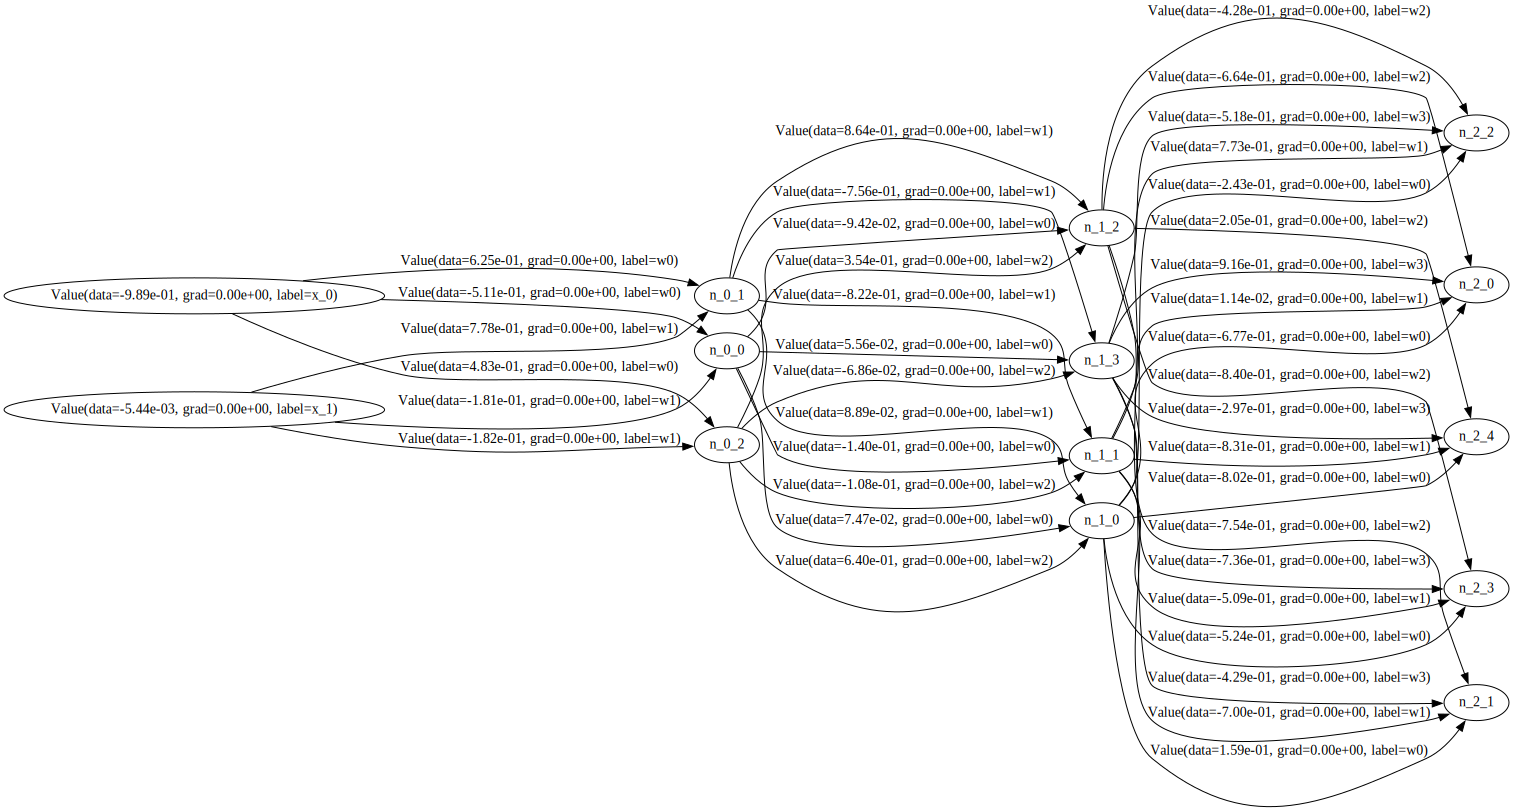

In [ ]:
x.draw_nn()